In [43]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [1]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select column_name from user_tab_columns where table_name = 'PURCUST2'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from purcust2")
x = cursor.fetchall()
df = pd.DataFrame(x,columns = col_list)
df.head()

['고객번호', '제휴사', '대분류코드', '중분류코드', '소분류코드', '구매금액', '성별', '연령대', '거주지역', '분기']


,고객번호,제휴사,대분류코드,중분류코드,소분류코드,구매금액,성별,연령대,거주지역,분기
0,12231,B,12,1206,B120605,5380,F,45세~49세,100.0,4
1,06422,B,6,0604,B060403,6500,F,40세~44세,100.0,4
2,06422,B,89,8901,B890101,2500,F,40세~44세,100.0,4
3,02041,B,1,0101,B010108,390,F,50세~54세,100.0,4
4,02041,B,16,1601,B160101,6420,F,50세~54세,100.0,4


In [3]:
cursor.execute("select 분기, round(sum(구매금액)/(sum(sum(구매금액)) over()),3)  from purcust2 group by 분기 order by 분기")
x = cursor.fetchall()
df = pd.DataFrame(x)
df.head()

,0,1
0,1.0,0.115
1,2.0,0.119
2,3.0,0.111
3,4.0,0.142
4,5.0,0.125


In [5]:
df.columns = ['분기','비율']
df

,분기,비율
0,1.0,0.115
1,2.0,0.119
2,3.0,0.111
3,4.0,0.142
4,5.0,0.125
5,6.0,0.125
6,7.0,0.117
7,8.0,0.146
8,NaN,NaN


In [7]:
df['계절지수'] = df.비율/0.125
df

,분기,비율,계절지수
0,1.0,0.115,0.920
1,2.0,0.119,0.952
2,3.0,0.111,0.888
3,4.0,0.142,1.136
4,5.0,0.125,1.000
5,6.0,0.125,1.000
6,7.0,0.117,0.936
7,8.0,0.146,1.168
8,NaN,NaN,NaN


In [11]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select 분기, sum(구매금액) from purcust2 group by 분기 order by 분기")
x = cursor.fetchall()
df = pd.DataFrame(x)
df

,0,1
0,1.0,8.445082e+10
1,2.0,8.460710e+10
2,3.0,8.440280e+10
3,4.0,8.486920e+10
4,5.0,8.445448e+10
5,6.0,8.483467e+10
6,7.0,8.497498e+10
7,8.0,8.441063e+10
8,NaN,NaN


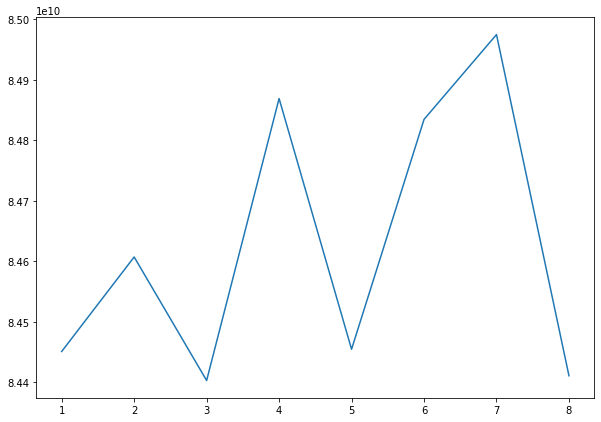

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(df.loc[0:8,0],df.loc[0:8,1])

In [17]:


con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select 분기,공통분류, sum(구매금액), count(*) from 기존고객구매정보 group by 분기, 공통분류 order by 공통분류,  분기")
x = cursor.fetchall()
df = pd.DataFrame(x,columns = ['분기','공통분류','총구매액','구매횟수'])
df

,분기,공통분류,총구매액,구매횟수
0,1,가구,2712725635,4992
1,2,가구,3007845134,5426
2,3,가구,3188463050,5417
3,4,가구,3316523214,5460
4,1,문화,468195158,22419
5,2,문화,492436839,23752
6,3,문화,519892730,25306
7,4,문화,429591624,24415
8,1,생활,9631591643,572857
9,2,생활,9624517800,602167


In [25]:
prod_list = sorted(list(set(df.공통분류.values)))
prod_list, len(prod_list)

(['가구',
  '문화',
  '생활',
  '스포츠_레저',
  '시설',
  '식품',
  '아동',
  '악세사리',
  '의류',
  '잡화',
  '전자제품',
  '화장품'],
 12)

In [24]:
df_groups = df.groupby('공통분류')

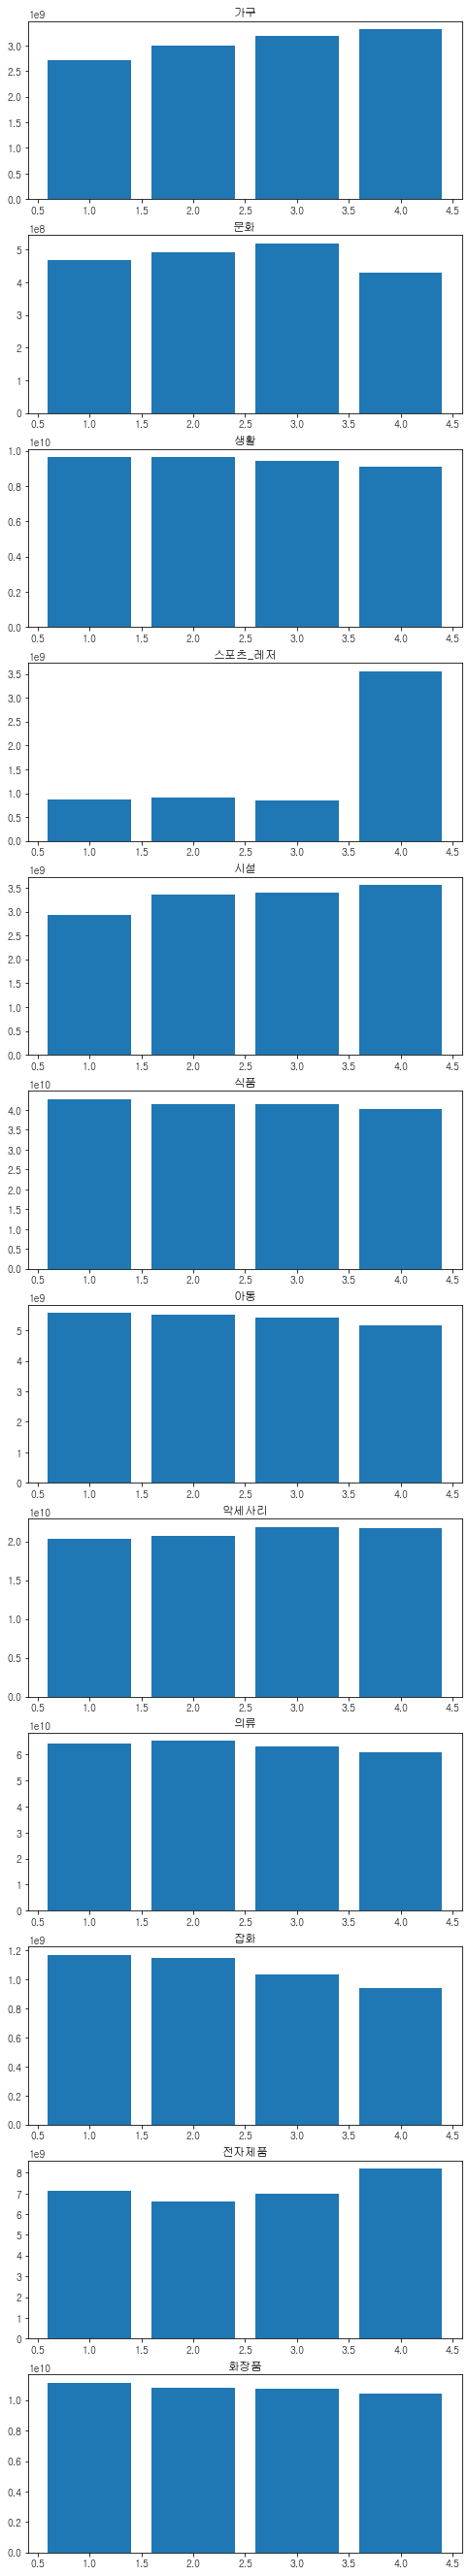

In [45]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12) = plt.subplots(figsize = (8,48),nrows=12)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
for ax, prod in zip(axs,prod_list):
    df_prod = df_groups.get_group(prod)
    #display(df_prod)
    ax.bar(df_prod.분기,df_prod.총구매액)
    ax.set_title(prod)

In [46]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select 분기,sum(구매금액), count(*) from 기존고객구매정보 group by 분기 order by 분기")
x = cursor.fetchall()
df = pd.DataFrame(x,columns = ['분기','총구매액','구매횟수'])
df

,분기,총구매액,구매횟수
0,1,168977160465,6707632
1,2,168899430504,7140599
2,3,168328705881,7430858
3,4,167464718382,7189664


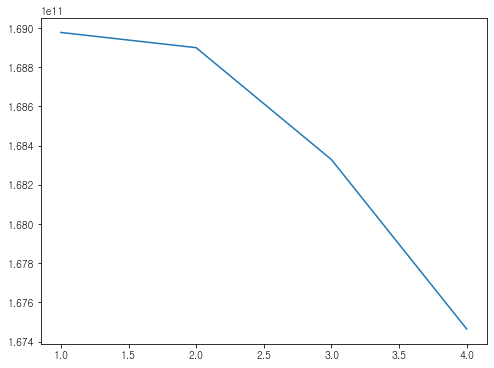

In [48]:
plt.figure(figsize = (8,6))
plt.plot(df.분기, df.총구매액)

In [49]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select 분기,sum(구매금액), count(*) from 신규고객구매정보 group by 분기 order by 분기")
x = cursor.fetchall()
df = pd.DataFrame(x,columns = ['분기','총구매액','구매횟수'])
df

,분기,총구매액,구매횟수
0,3,32935953,2405
1,4,342091827,9268


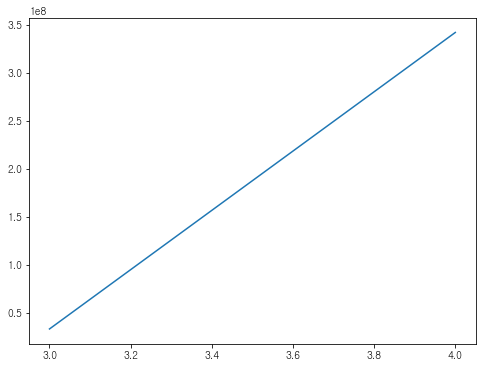

In [50]:
plt.figure(figsize = (8,6))
plt.plot(df.분기, df.총구매액)

In [51]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute("select 분기,sum(구매금액), count(*) from 이탈고객구매정보 group by 분기 order by 분기")
x = cursor.fetchall()
df = pd.DataFrame(x,columns = ['분기','총구매액','구매횟수'])
df

,분기,총구매액,구매횟수
0,1,61110681,1275
1,2,66694121,1279
2,3,11924721,338


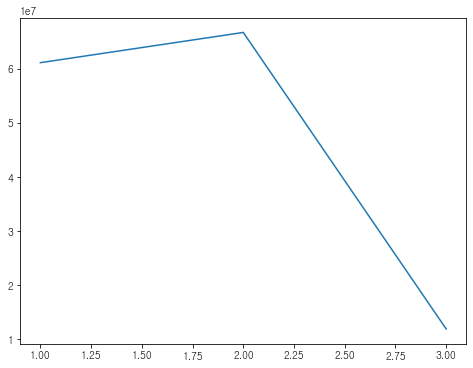

In [52]:
plt.figure(figsize = (8,6))
plt.plot(df.분기, df.총구매액)